In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/winequalityN.csv')
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2665,white,8.3,0.400,0.41,8.2,0.050,15.0,122.0,0.99790,3.39,0.49,9.3,5
2354,white,6.5,0.210,0.28,1.4,0.046,26.0,66.0,0.99199,3.43,0.48,11.1,6
3339,white,7.6,0.170,0.27,4.6,0.050,23.0,98.0,0.99422,3.08,0.47,9.5,6
324,white,8.3,0.410,0.51,2.0,0.046,11.0,207.0,0.99300,3.02,0.55,11.4,5
224,white,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,6


In [2]:
df = df.dropna()

df['is_white_wine'] = [
    1 if typ == 'white' else 0 for typ in df['type']
]
df.drop('type', axis=1, inplace=True)

df['is_good_wine'] = [
    1 if quality >= 6 else 0 for quality in df['quality']
]
df.drop('quality', axis=1, inplace=True)

df.head()

from sklearn.model_selection import train_test_split

X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import tensorflow as tf
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=100)

e:\github\validation-service\venv-windows1\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
162/162 [==============================] - 2s 3ms/step - loss: 0.6184 - accuracy: 0.7124 - precision: 0.7464 - recall: 0.8280
Epoch 2/100
162/162 [==============================] - 1s 3ms/step - loss: 0.5343 - accuracy: 0.7335 - precision: 0.7523 - recall: 0.8646
Epoch 3/100
162/162 [==============================] - 0s 3ms/step - loss: 0.5200 - accuracy: 0.7547 - precision: 0.7782 - recall: 0.8579
Epoch 4/100
162/162 [==============================] - 1s 3ms/step - loss: 0.5072 - accuracy: 0.7557 - precision: 0.7979 - recall: 0.8235
Epoch 5/100
162/162 [==============================] - 0s 3ms/step - loss: 0.5101 - accuracy: 0.7569 - precision: 0.7883 - recall: 0.8433
Epoch 6/100
162/162 [==============================] - 0s 3ms/step - loss: 0.5061 - accuracy: 0.7511 - precision: 0.7797 - recall: 0.8470
Epoch 7/100
162/162 [==============================] - 0s 3ms/step - loss: 0.5054 - accuracy: 0.7634 - precision: 0.8055 - recall: 0.8268
Epoch 8/100
162/162 [=============

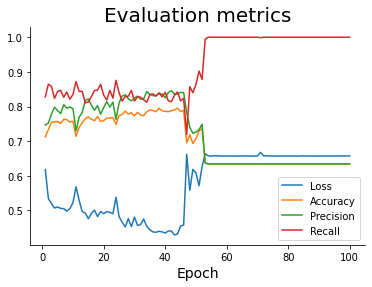

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(
    np.arange(1, 101),
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101),
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101),
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101),
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();